In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, precision_recall_fscore_support

In [2]:
#from google.colab import drive, files
#drive.mount('/content/drive')

In [3]:
#cd "/content/drive/My Drive/UFPA/Healthsense/second round of tests"
#cd "/content/drive/My Drive/UFPA/Healthsense/fourth round of tests (additional features for new paper proposal)"

### Introduzindo os dados

In [2]:
step_1 = pd.read_csv('challenge_raw_everyone.csv')
step_2 = pd.read_csv('challenge_processed_everyone.csv')
step_3 = pd.read_csv('challenge_cleaned_everyone.csv')
step_4 = pd.read_csv('challenge_cleaned_everyone.csv')
step_5 = pd.read_csv('challenge_cleaned_everyone.csv')

In [5]:
step_1.head(5)

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,...,mean_t_onset,mean_t_offset,mean_qt_interval,mean_st_interval,mean_t_wave,mean_pq_segment,mean_st_segment,mean_tp_segment,mean_pp_interval,person
0,-0.701111,0.784830,-0.179636,0.784830,0.784830,0.018006,0.034715,0.012976,905.000000,1.485941,...,-0.543653,0.294066,25.000000,25.000000,6.000000,25.000000,31.000000,175.500000,905.0,tr14-0291
1,-0.702451,0.803866,-0.198301,0.836352,0.803866,0.042043,0.046781,0.002086,851.666667,1.506318,...,-0.337942,0.381267,28.000000,28.000000,5.250000,57.666667,33.333333,165.000000,1000.0,tr14-0291
2,-0.735116,0.828857,-0.189432,0.828857,0.828857,0.011432,0.034666,0.006261,915.000000,1.563974,...,-0.491265,0.339631,27.333333,27.333333,5.666667,27.333333,33.000000,177.500000,915.0,tr14-0291
3,-0.755942,0.836444,-0.192762,0.836444,0.836444,0.020925,0.024130,0.003897,895.000000,1.592386,...,-0.453542,0.316039,26.000000,26.000000,5.666667,26.000000,31.666667,173.500000,895.0,tr14-0291
4,-0.774949,0.831752,-0.189265,0.840309,0.831752,0.014634,0.032184,0.004051,916.666667,1.606701,...,-0.558065,0.281888,28.750000,28.750000,6.000000,41.250000,34.750000,177.333333,1000.0,tr14-0291


## Passo 1: Treino sem modificações aos dados originais

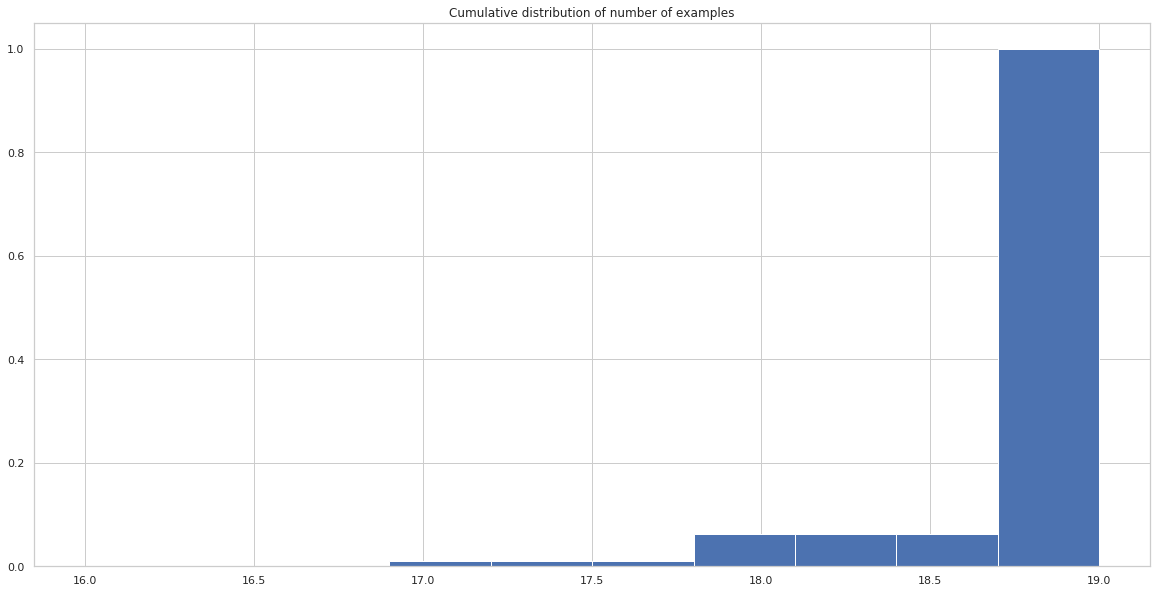

In [12]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_1['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [13]:
## Remove pessoas que tem menos que 28 segmentos
min_n_of_segments = 16
mask = step_1['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)

for person in people_to_remove:
    step_1 = step_1[step_1.person != person]

In [14]:
#le_step_1 = LabelEncoder()
#step_1['person'] = pd.Series(le_step_1.fit_transform(step_1['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_1 = step_1[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_1 = X_step_1.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_1 = step_1['person']
X_train_step_1, X_test_step_1, y_train_step_1, y_test_step_1 = train_test_split(X_step_1, y_step_1,
                                                                                test_size = 0.2)

In [17]:
'''
rf_step_1 = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=3, min_samples_split=10, verbose=3)
rf_step_1.fit(X_train_step_1, y_train_step_1)
predictions_step_1 = rf_step_1.predict(X_test_step_1)
'''
n_folds = 1
list_of_training_x = np.array_split(X_train_step_1, n_folds)
list_of_training_y = np.array_split(y_train_step_1, n_folds)
n_estimators = 100

rf_step_1 = RandomForestClassifier(warm_start=True, n_estimators=n_estimators, max_depth=80, min_samples_leaf=3, min_samples_split=10, verbose=3)
for i in range(n_folds):
    rf_step_1.fit(list_of_training_x[i], list_of_training_y[i])
    rf_step_1.set_params(n_estimators=n_estimators)
    n_estimators+=50

predictions_step_1 = rf_step_1.predict(X_test_step_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.2s finished


In [18]:
cr = classification_report(y_test_step_1, predictions_step_1, output_dict=True)
df = pd.DataFrame(cr).transpose()
df.to_csv('result_1.csv')

/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Passo 2: Treino com adição de segmentos gerados aleatoriamente

In [20]:
step_2.head()

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,...,mean_t_onset,mean_t_offset,mean_qt_interval,mean_st_interval,mean_t_wave,mean_pq_segment,mean_st_segment,mean_tp_segment,mean_pp_interval,person
0,-0.701111,0.784830,-0.179636,0.784830,0.784830,0.018006,0.034715,0.012976,905.000000,1.485941,...,-0.543653,0.294066,25.000000,25.000000,6.000000,25.000000,31.000000,175.500000,905.0,tr14-0291
1,-0.702451,0.803866,-0.198301,0.836352,0.803866,0.042043,0.046781,0.002086,851.666667,1.506318,...,-0.337942,0.381267,28.000000,28.000000,5.250000,57.666667,33.333333,165.000000,1000.0,tr14-0291
2,-0.735116,0.828857,-0.189432,0.828857,0.828857,0.011432,0.034666,0.006261,915.000000,1.563974,...,-0.491265,0.339631,27.333333,27.333333,5.666667,27.333333,33.000000,177.500000,915.0,tr14-0291
3,-0.755942,0.836444,-0.192762,0.836444,0.836444,0.020925,0.024130,0.003897,895.000000,1.592386,...,-0.453542,0.316039,26.000000,26.000000,5.666667,26.000000,31.666667,173.500000,895.0,tr14-0291
4,-0.774949,0.831752,-0.189265,0.840309,0.831752,0.014634,0.032184,0.004051,916.666667,1.606701,...,-0.558065,0.281888,28.750000,28.750000,6.000000,41.250000,34.750000,177.333333,1000.0,tr14-0291


In [21]:
#le_step_2 = LabelEncoder()
#step_2['person'] = pd.Series(le_step_2.fit_transform(step_2['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_2 = step_2[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_2 = X_step_2.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_2 = step_2['person']

X_train_step_2, X_test_step_2, y_train_step_2, y_test_step_2 = train_test_split(X_step_2, y_step_2,
                                                                                test_size = 0.2)

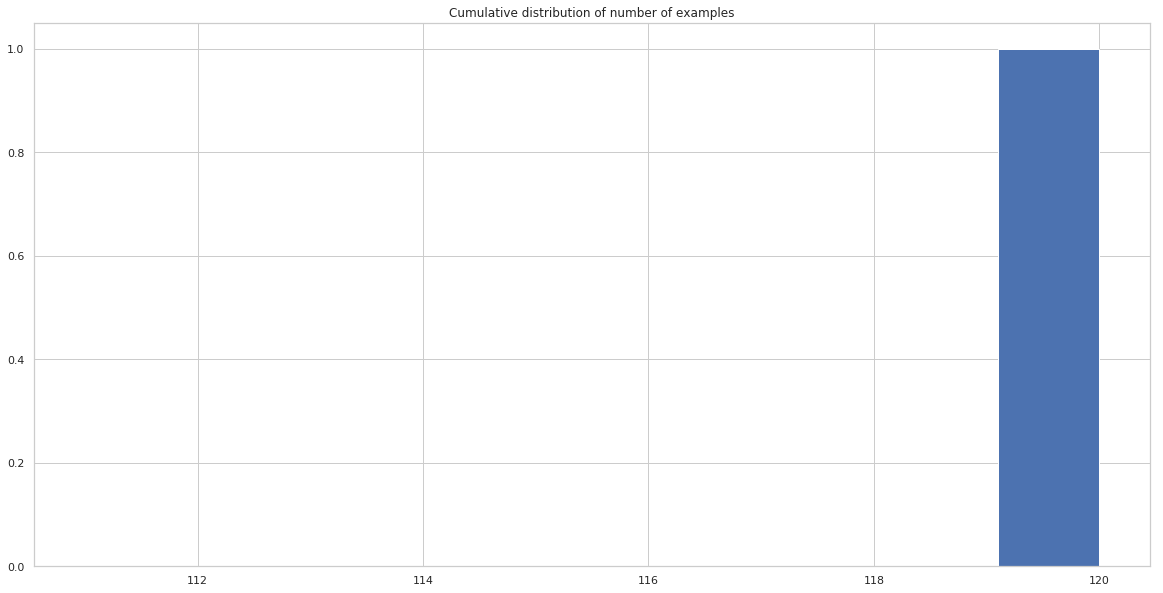

In [22]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_2['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [23]:
list_of_training_x = np.array_split(X_train_step_2, 2)
list_of_training_y = np.array_split(y_train_step_2, 2)
n_estimators = 50

rf_step_2 = RandomForestClassifier(warm_start=True, n_estimators=n_estimators, max_depth=80, min_samples_leaf=3, min_samples_split=10, verbose=3)
for i in range(2):
    rf_step_2.fit(list_of_training_x[i], list_of_training_y[i])
    rf_step_2.set_params(n_estimators=n_estimators)
    n_estimators+=50

predictions_step_2 = rf_step_2.predict(X_test_step_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.8s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.7min finished
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.6s finished


In [24]:
cr_step_2 = classification_report(y_test_step_2, predictions_step_2, output_dict=True)
cr_df_step_2 = pd.DataFrame(cr_step_2).transpose()
cr_df_step_2.to_csv('result_2.csv')

## Passo 3: Treino com adição de segmentos gerados aleatoriamente e remoção de 

---

outliers

In [25]:
step_3.head()

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,...,mean_t_onset,mean_t_offset,mean_qt_interval,mean_st_interval,mean_t_wave,mean_pq_segment,mean_st_segment,mean_tp_segment,mean_pp_interval,person
0,-0.701111,0.784830,-0.179636,0.784830,0.784830,0.018006,0.034715,0.012976,905.000000,1.485941,...,-0.543653,0.294066,25.000000,25.000000,6.000000,25.000000,31.000000,175.500000,905.0,tr14-0291
1,-0.702451,0.803866,-0.198301,0.836352,0.803866,0.042043,0.046781,0.002086,851.666667,1.506318,...,-0.337942,0.381267,28.000000,28.000000,5.250000,57.666667,33.333333,165.000000,1000.0,tr14-0291
2,-0.735116,0.828857,-0.189432,0.828857,0.828857,0.011432,0.034666,0.006261,915.000000,1.563974,...,-0.491265,0.339631,27.333333,27.333333,5.666667,27.333333,33.000000,177.500000,915.0,tr14-0291
3,-0.755942,0.836444,-0.192762,0.836444,0.836444,0.020925,0.024130,0.003897,895.000000,1.592386,...,-0.453542,0.316039,26.000000,26.000000,5.666667,26.000000,31.666667,173.500000,895.0,tr14-0291
4,-0.774949,0.831752,-0.189265,0.840309,0.831752,0.014634,0.032184,0.004051,916.666667,1.606701,...,-0.558065,0.281888,28.750000,28.750000,6.000000,41.250000,34.750000,177.333333,1000.0,tr14-0291


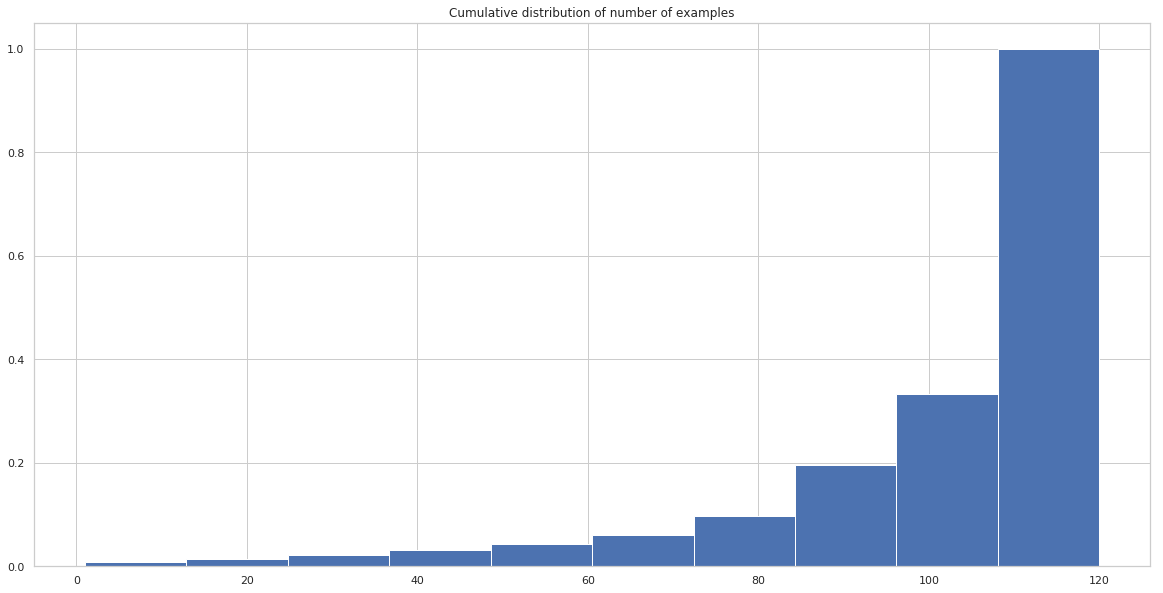

In [26]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_3['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [27]:
## Remove pessoas que tem menos que 60 segmentos
min_n_of_segments = 60
mask = step_3['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)
for person in people_to_remove:
    step_3 = step_3[step_3.person != person]

In [28]:
#le_step_3 = LabelEncoder()
#step_3['person'] = pd.Series(le_step_3.fit_transform(step_3['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_3 = step_3[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_3 = X_step_3.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_3 = step_3['person']

X_train_step_3, X_test_step_3, y_train_step_3, y_test_step_3 = train_test_split(X_step_3, y_step_3,
                                                                                test_size = 0.2, stratify=y_step_3)
print(f'Há {y_train_step_3.nunique()} classes únicas no conjunto de TREINO')
print(f'Há {y_test_step_3.nunique()} classes únicas no conjunto de TESTE')

Há 1882 classes únicas no conjunto de TREINO
Há 1882 classes únicas no conjunto de TESTE


In [29]:
batch_size = 2
list_of_training_x_step_3 = np.array_split(X_train_step_3, batch_size)
list_of_training_y_step_3 = np.array_split(y_train_step_3, batch_size)
n_estimators = 50

# Verifica sem algum split ficou com uma amostra a menos
for count, y in enumerate(list_of_training_y_step_3):
    print(f'Elementos unicos no split {count}:', y.nunique())

rf_step_3 = RandomForestClassifier(warm_start=True, n_estimators=n_estimators, max_depth=80, min_samples_leaf=3, min_samples_split=10, verbose=3)

for i in range(batch_size):
    rf_step_3.fit(list_of_training_x_step_3[i], list_of_training_y_step_3[i])
    n_estimators += 50
    rf_step_3.set_params(n_estimators=n_estimators)

Elementos unicos no split 0: 1882
Elementos unicos no split 1: 1882


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.0s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished


In [30]:
predictions_step_3 = rf_step_3.predict(X_test_step_3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [31]:
cr_step_3 = classification_report(y_test_step_3, predictions_step_3, output_dict=True)
cr_df_step_3 = pd.DataFrame(cr_step_3).transpose()
cr_df_step_3.to_csv('result_3.csv')

/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Passo 4: Treino com algumas novas features, segmentos gerados aleatoriamente e remoção de ouliers

In [3]:
step_4.head()

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,...,mean_t_onset,mean_t_offset,mean_qt_interval,mean_st_interval,mean_t_wave,mean_pq_segment,mean_st_segment,mean_tp_segment,mean_pp_interval,person
0,-0.701111,0.784830,-0.179636,0.784830,0.784830,0.018006,0.034715,0.012976,905.000000,1.485941,...,-0.543653,0.294066,25.000000,25.000000,6.000000,25.000000,31.000000,175.500000,905.0,tr14-0291
1,-0.702451,0.803866,-0.198301,0.836352,0.803866,0.042043,0.046781,0.002086,851.666667,1.506318,...,-0.337942,0.381267,28.000000,28.000000,5.250000,57.666667,33.333333,165.000000,1000.0,tr14-0291
2,-0.735116,0.828857,-0.189432,0.828857,0.828857,0.011432,0.034666,0.006261,915.000000,1.563974,...,-0.491265,0.339631,27.333333,27.333333,5.666667,27.333333,33.000000,177.500000,915.0,tr14-0291
3,-0.755942,0.836444,-0.192762,0.836444,0.836444,0.020925,0.024130,0.003897,895.000000,1.592386,...,-0.453542,0.316039,26.000000,26.000000,5.666667,26.000000,31.666667,173.500000,895.0,tr14-0291
4,-0.774949,0.831752,-0.189265,0.840309,0.831752,0.014634,0.032184,0.004051,916.666667,1.606701,...,-0.558065,0.281888,28.750000,28.750000,6.000000,41.250000,34.750000,177.333333,1000.0,tr14-0291


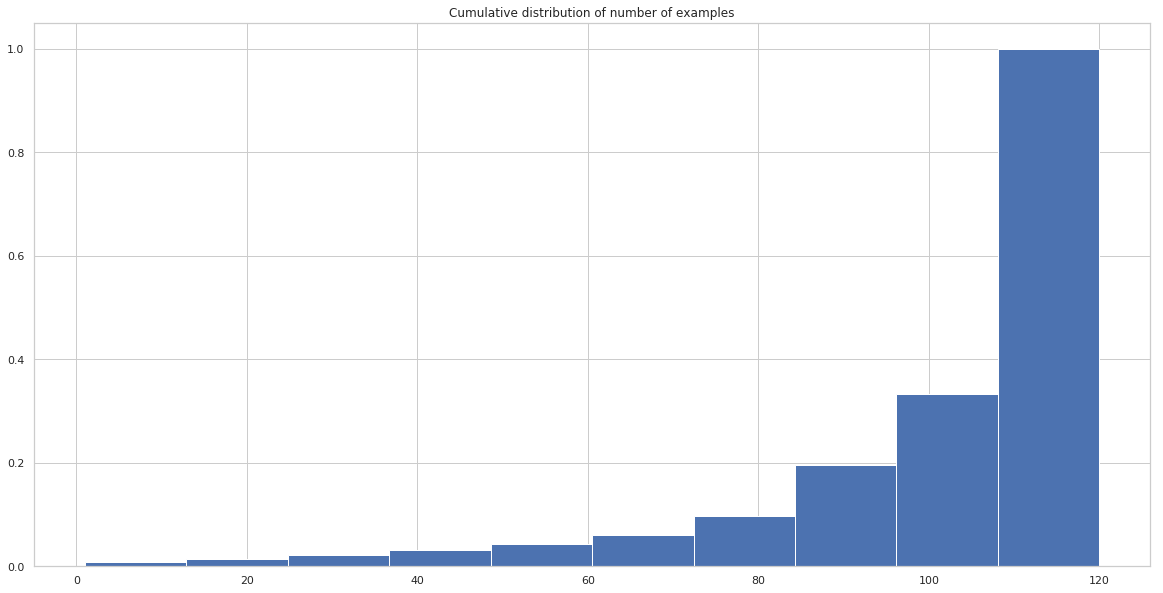

In [33]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_4['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [4]:
## Remove pessoas que tem menos que 60 segmentos
min_n_of_segments = 60
mask = step_4['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)
for person in people_to_remove:
    step_4 = step_4[step_4.person != person]

In [5]:
#le_step_4 = LabelEncoder()
#step_4['person'] = pd.Series(le_step_4.fit_transform(step_4['person']))

X_step_4 = step_4.drop(['mean_qt_interval', 'mean_st_interval', 'mean_t_wave', 'mean_pq_segment', 'mean_st_segment', 'mean_tp_segment', 'mean_pp_interval', 'person'], axis=1)
# Preenche os dados faltosos com a média da respectiva coluna
X_step_4 = X_step_4.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_4 = step_4['person']

X_train_step_4, X_test_step_4, y_train_step_4, y_test_step_4 = train_test_split(X_step_4, y_step_4,
                                                                                test_size = 0.2, stratify=y_step_4)
print(f'Há {y_train_step_4.nunique()} classes únicas no conjunto de TREINO')
print(f'Há {y_test_step_4.nunique()} classes únicas no conjunto de TESTE')

Há 1882 classes únicas no conjunto de TREINO
Há 1882 classes únicas no conjunto de TESTE


In [7]:
batch_size = 4
list_of_training_x_step_4 = np.array_split(X_train_step_4, batch_size)
list_of_training_y_step_4 = np.array_split(y_train_step_4, batch_size)
n_estimators = 50

# Verifica sem algum split ficou com uma amostra a menos
for count, y in enumerate(list_of_training_y_step_4):
    print(f'Elementos unicos no split {count}:', y.nunique())

rf_step_4 = RandomForestClassifier(warm_start=True, n_estimators=n_estimators, max_depth=100, min_samples_leaf=3, min_samples_split=10, verbose=3)

for i in range(batch_size):
    rf_step_4.fit(list_of_training_x_step_4[i], list_of_training_y_step_4[i])
    n_estimators += 25
    rf_step_4.set_params(n_estimators=n_estimators)

Elementos unicos no split 0: 1882
Elementos unicos no split 1: 1882
Elementos unicos no split 2: 1882
Elementos unicos no split 3: 1882
building tree 1 of 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished


In [8]:
predictions_step_4 = rf_step_4.predict(X_test_step_4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.7min finished


In [9]:
cr_step_4 = classification_report(y_test_step_4, predictions_step_4, output_dict=True)
cr_df_step_4 = pd.DataFrame(cr_step_4).transpose()
cr_df_step_4.to_csv('result_4.csv')

/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Passo 5: Adicionando ainda mais features

In [ ]:
step_5.head()

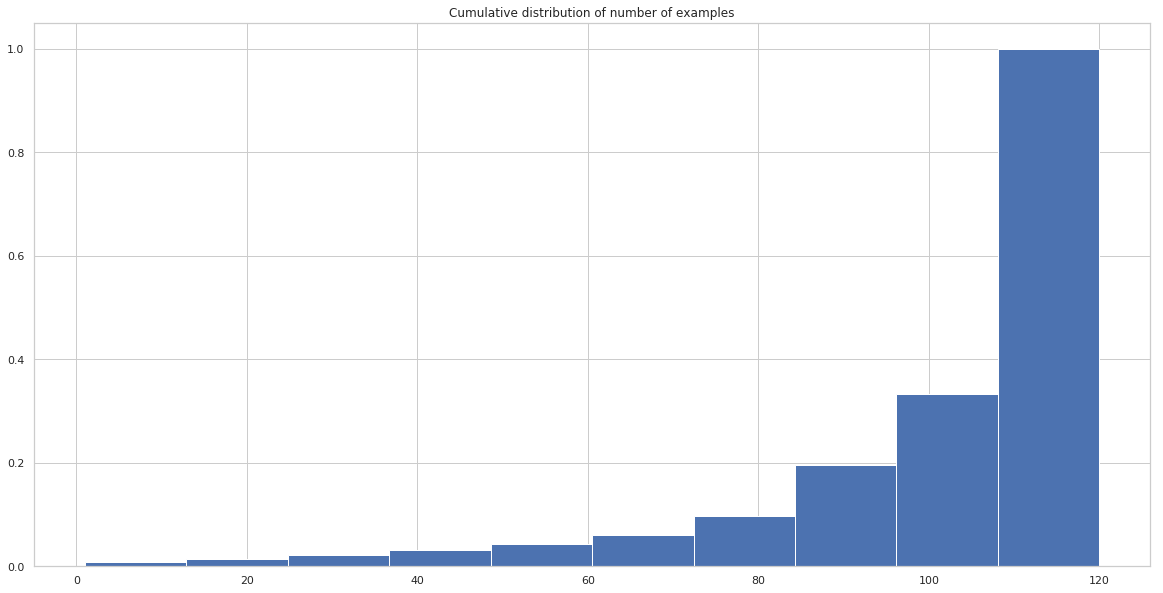

In [3]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_5['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [4]:
## Remove pessoas que tem menos que 60 segmentos
min_n_of_segments = 60
mask = step_5['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)

for person in people_to_remove:
    step_5 = step_5[step_5.person != person]

In [5]:
#le_step_5 = LabelEncoder()
#step_5['person'] = pd.Series(le_step_5.fit_transform(step_5['person']))

X_step_5 = step_5.drop('person', axis=1)
# Preenche os dados faltosos com a média da respectiva coluna
X_step_5 = X_step_5.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_5 = step_5['person']

X_train_step_5, X_test_step_5, y_train_step_5, y_test_step_5 = train_test_split(X_step_5, y_step_5,
                                                                                test_size = 0.2, stratify=y_step_5)
print(f'Há {y_train_step_5.nunique()} classes únicas no conjunto de TREINO')
print(f'Há {y_test_step_5.nunique()} classes únicas no conjunto de TESTE')

Há 1882 classes únicas no conjunto de TREINO
Há 1882 classes únicas no conjunto de TESTE


In [6]:
batch_size = 4
list_of_training_x_step_5 = np.array_split(X_train_step_5, batch_size)
list_of_training_y_step_5 = np.array_split(y_train_step_5, batch_size)
n_estimators = 50

# Verifica sem algum split ficou com uma amostra a menos
for count, y in enumerate(list_of_training_y_step_5):
    print(f'Elementos unicos no split {count}:', y.nunique())

rf_step_5 = RandomForestClassifier(warm_start=True, n_estimators=n_estimators, max_depth=100, min_samples_leaf=3, min_samples_split=10, verbose=3)

for i in range(batch_size):
    rf_step_5.fit(list_of_training_x_step_5[i], list_of_training_y_step_5[i])
    n_estimators += 25
    rf_step_5.set_params(n_estimators=n_estimators)

Elementos unicos no split 0: 1882
Elementos unicos no split 1: 1882
Elementos unicos no split 2: 1882
Elementos unicos no split 3: 1882
building tree 1 of 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.6min finished


In [7]:
predictions_step_5 = rf_step_5.predict(X_test_step_5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.5min finished


In [8]:
cr_step_5 = classification_report(y_test_step_5, predictions_step_5, output_dict=True)
cr_df_step_5 = pd.DataFrame(cr_step_5).transpose()
cr_df_step_5.to_csv('result_5.csv')

## Verificando a importância das features

In [9]:
importances = [(feature, round(importance, 2)) for feature, importance in zip(X_step_5.columns, rf_step_5.feature_importances_)]
sorted_importances = sorted(importances, key=lambda x:x[1], reverse=True) 

for pair in sorted_importances:
    print('Feature: {:20} Importance: {}'.format(*pair))

Feature: mean_q               Importance: 0.07
Feature: mean_s               Importance: 0.06
Feature: mean_rr_interval     Importance: 0.06
Feature: mean_rq_amplitude    Importance: 0.06
Feature: mean_t_wave          Importance: 0.06
Feature: mean_tp_segment      Importance: 0.06
Feature: mean_r               Importance: 0.05
Feature: mean_p               Importance: 0.05
Feature: mean_t               Importance: 0.05
Feature: mean_qrs_offset      Importance: 0.05
Feature: mean_qrs_onset       Importance: 0.05
Feature: mean_t_offset        Importance: 0.05
Feature: mean_p_offset        Importance: 0.04
Feature: mean_st_segment      Importance: 0.04
Feature: mean_pp_interval     Importance: 0.04
Feature: mean_qs_distance     Importance: 0.03
Feature: mean_qt_distance     Importance: 0.03
Feature: mean_p_onset         Importance: 0.03
Feature: mean_t_onset         Importance: 0.03
Feature: mean_qt_interval     Importance: 0.03
Feature: mean_st_interval     Importance: 0.03
Feature: stde

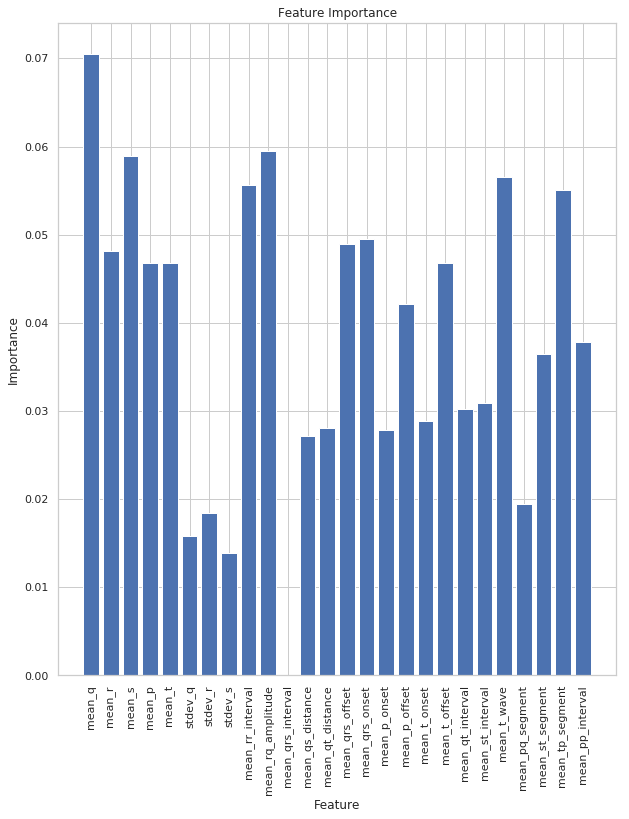

In [10]:
x_values = range(len(rf_step_5.feature_importances_))
plt.figure(figsize=(10,12))
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.xticks(x_values, X_step_5.columns, rotation='vertical')
plt.bar(x_values, rf_step_5.feature_importances_, orientation = 'vertical')
plt.savefig("feature_importance.jpg")

## Visualizing the results

In [11]:
 def set_shared_ylabel(a, ylabel, labelpad = 0.01):
    """Set a y label shared by multiple axes
    Parameters
    ----------
    a: list of axes
    ylabel: string
    labelpad: float
        Sets the padding between ticklabels and axis label"""

    f = a[0].get_figure()
    f.canvas.draw() #sets f.canvas.renderer needed below

    # get the center position for all plots
    top = a[0].get_position().y1
    bottom = a[-1].get_position().y0

    # get the coordinates of the left side of the tick labels 
    x0 = 1
    for at in a:
        at.set_ylabel('') # just to make sure we don't and up with multiple labels
        bboxes, _ = at.yaxis.get_ticklabel_extents(f.canvas.renderer)
        bboxes = bboxes.inverse_transformed(f.transFigure)
        xt = bboxes.x0
        if xt < x0:
            x0 = xt
    tick_label_left = x0

    # set position of label
    a[-1].set_ylabel(ylabel, fontsize=22)
    a[-1].yaxis.set_label_coords(tick_label_left - labelpad,(bottom + top)/2, transform=f.transFigure)

In [12]:
def filter_results(results):
    """ Remove the last three rows of a result csv
        where there are the accuracy, macro avg and
        weighted avg values
    """
    results.rename(columns={"Unnamed: 0": "person"}, inplace=True)

    accuracy = results[results['person'] == 'accuracy']
    macro_avg = results[results['person'] == 'macro avg']
    weighted_avg = results[results['person'] == 'weighted avg']

    results.drop(results.tail(3).index,inplace=True)

    return results, accuracy, macro_avg, weighted_avg

In [13]:
# plot settings

sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2})
#plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams.update({'font.size': 22})

In [14]:
results_step_1, accuracy_step_1, macro_avg_step_1, weighted_avg_step_1 = filter_results(pd.read_csv('result_1.csv'))
results_step_2, accuracy_step_2, macro_avg_step_2, weighted_avg_step_2 = filter_results(pd.read_csv('result_2.csv'))
results_step_3, accuracy_step_3, macro_avg_step_3, weighted_avg_step_3 = filter_results(pd.read_csv('result_3.csv'))
results_step_4, accuracy_step_4, macro_avg_step_4, weighted_avg_step_4 = filter_results(pd.read_csv('result_4.csv'))
results_step_5, accuracy_step_5, macro_avg_step_5, weighted_avg_step_5 = filter_results(pd.read_csv('result_5.csv'))

In [15]:
# example
accuracy_step_4.tail()

,person,f1-score,precision,recall,support


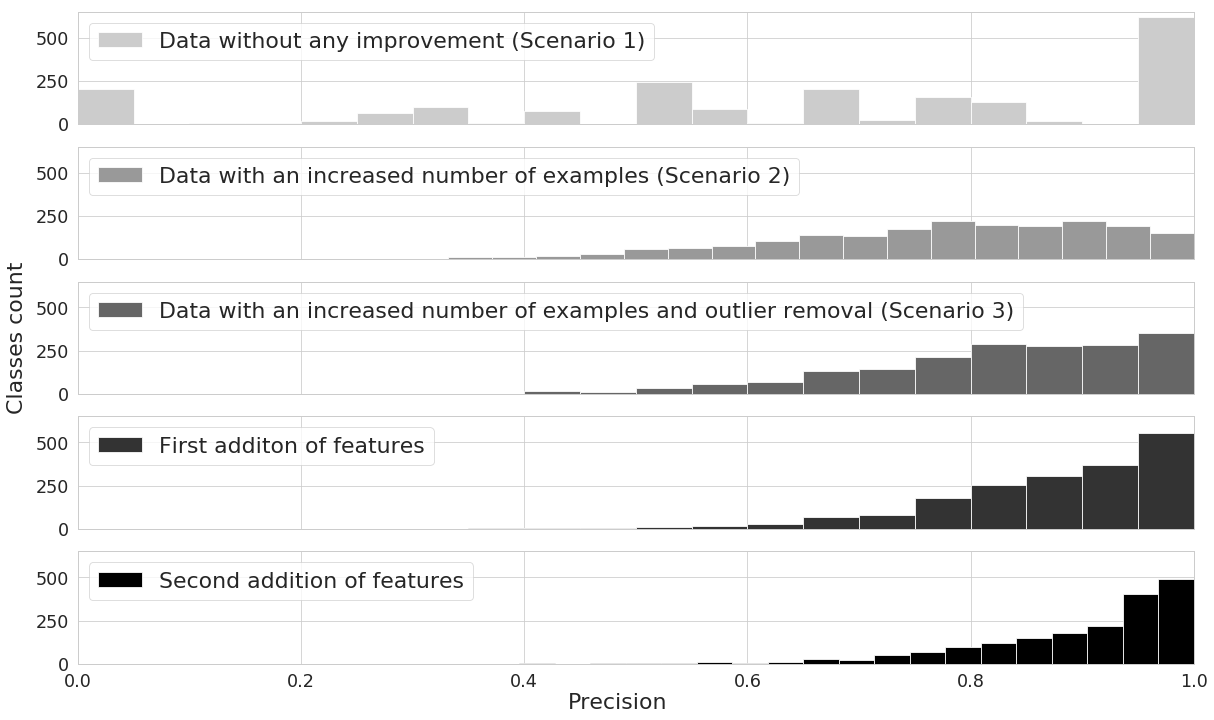

In [29]:
sharex='col'
f, axes = plt.subplots(5, 1, figsize=(20, 12), sharex=True, sharey=True)
plt.xlim(0, 1)
metric= 'precision'
bins = 20
kde = False
aplha = 1
y_lower_lim = 0
y_upper_lim = 650

#f.suptitle(f'{metric} histogram', fontsize=17)
set_shared_ylabel(axes, 'Classes count')
plt.xticks(labels=None)
# shared x label 
f.text(0.5, 0.08, 'Precision', ha='center', va='center', fontsize=22)

# first distplot blue
sns.distplot(results_step_1[metric], bins=bins, kde=kde,
             ax=axes[0], color="#cccccc",
             label="Data without any improvement (Scenario 1)",
             hist_kws={"alpha":aplha})
axes[0].legend(loc="upper left", prop={'size': 22})
axes[0].set_ylim(y_lower_lim,y_upper_lim)
axes[0].set_xlabel(None)

# second distpot olive
sns.distplot(results_step_2[metric], bins=bins, kde=kde,
             ax=axes[1], color="#999999",
             label="Data with an increased number of examples (Scenario 2)",
             hist_kws={"alpha":aplha})
axes[1].legend(loc="upper left", prop={'size': 22})
axes[1].set_ylim(y_lower_lim,y_upper_lim)
axes[1].set_xlabel(None)

# third distplot red
sns.distplot(results_step_3[metric], bins=bins, kde=kde,
             ax=axes[2], color="#666666",
             label="Data with an increased number of examples and outlier removal (Scenario 3)",
             hist_kws={"alpha":aplha})
axes[2].legend(loc="upper left", prop={'size': 22})
axes[2].set_ylim(y_lower_lim,y_upper_lim)
axes[2].set_xlabel(None)

# fourth distplot purple
sns.distplot(results_step_4[metric], bins=bins, kde=kde,
             ax=axes[3], color="#333333",
             label="First additon of features",
             hist_kws={"alpha":aplha})
axes[3].legend(loc="upper left", prop={'size': 22})
axes[3].set_ylim(y_lower_lim,y_upper_lim)
axes[3].set_xlabel(None)

# fifth distplot purple
sns.distplot(results_step_5[metric], bins=bins, kde=kde,
             ax=axes[4], color="#000000",
             label="Second addition of features",
             hist_kws={"alpha":aplha})
axes[4].legend(loc="upper left", prop={'size': 22})
axes[4].set_ylim(y_lower_lim,y_upper_lim)
axes[4].set_xlabel(None)

plt.savefig("precision_histogram.png")
#files.download("precision_histogram.eps")

/home/renato/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


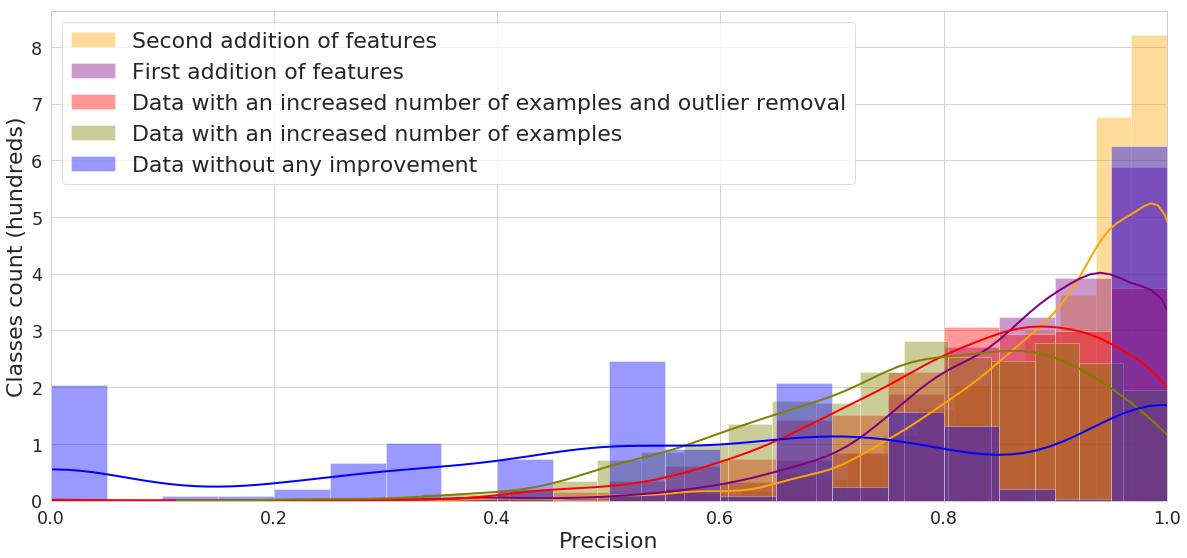

In [17]:
#Number of classesTODO deix as cores do fundo opacas
plt.figure(figsize=(20,9))
bins = 20
metric = 'precision'
kde=True
sns.distplot(results_step_5[metric], bins=bins, kde=kde, color="orange", label="Second addition of features")
sns.distplot(results_step_4[metric], bins=bins, kde=kde, color="purple", label="First addition of features")
sns.distplot(results_step_3[metric], bins=bins, kde=kde, color="red", label="Data with an increased number of examples and outlier removal")
sns.distplot(results_step_2[metric], bins=bins, kde=kde, color="olive", label="Data with an increased number of examples")
sns.distplot(results_step_1[metric], bins=bins, kde=kde, color="blue", label="Data without any improvement")
plt.ylabel('Classes count (hundreds)', fontsize=22)
plt.xlabel('Precision', fontsize=22)
#plt.title(f'Overlapped {metric} histogram', fontsize=22)
plt.xlim(0, 1)
#plt.ylim(0, 500)
plt.legend(loc="upper left", prop={'size': 22})

plt.savefig("precision_final.png")
#files.download("precision_final.png") 

In [18]:
 #unifica os resultados dos 4 testes em um dataframe unico
list_of_results = [results_step_1.mean(), results_step_2.mean(), results_step_3.mean(), results_step_4.mean(), results_step_5.mean()]
df = pd.DataFrame(list_of_results)
df.drop(['support'],  axis=1, inplace=True)
df

,f1-score,precision,recall
0,0.616611,0.647721,0.661120
1,0.768269,0.778729,0.777329
2,0.812263,0.825120,0.815583
3,0.860039,0.873666,0.862276
4,0.888802,0.900181,0.889923


## Barplot empilhado

In [ ]:
# y-axis in bold
plt.figure(figsize=(18,8))
# 
bars1 = np.add(df.loc[0], df.loc[1]).tolist()
bars2 = np.add(np.add(df.loc[0], df.loc[1]), df.loc[2]).tolist()
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['precision','recall','f1-score']
barWidth = 0.60
plt.ylim(0.0,1)
alpha = 1

# Create brown bars
# 368069 old color
plt.bar(r, df.loc[3], color='#c7f0db', alpha=alpha, width=barWidth, label="Data using our proposed model")

# Create green bars (middle), on top of the firs ones
# 56CCA9 old color
plt.bar(r, df.loc[2], color='#8bbabb', alpha=alpha, width=barWidth, label="Data with an increased number of examples and outlier removal")

# Create green bars (top)
#6BFFD3
plt.bar(r, df.loc[1], color='#6c7b95', alpha=alpha, width=barWidth, label="Data with an increased number of examples")

# step 4
#B8FFEA
plt.bar(r, df.loc[0], color='#464159', alpha=alpha, width=barWidth, label="Data without any improvement")
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
#plt.title('Metrics increase over dataset improvements', fontsize=16)
plt.ylabel("Evaluation", fontsize=22)
plt.xlabel("Metric", fontsize=22)
plt.legend(loc="lower right", prop={'size':22})

plt.savefig("increased_signal.png")
#files.download("increased_signal.png")

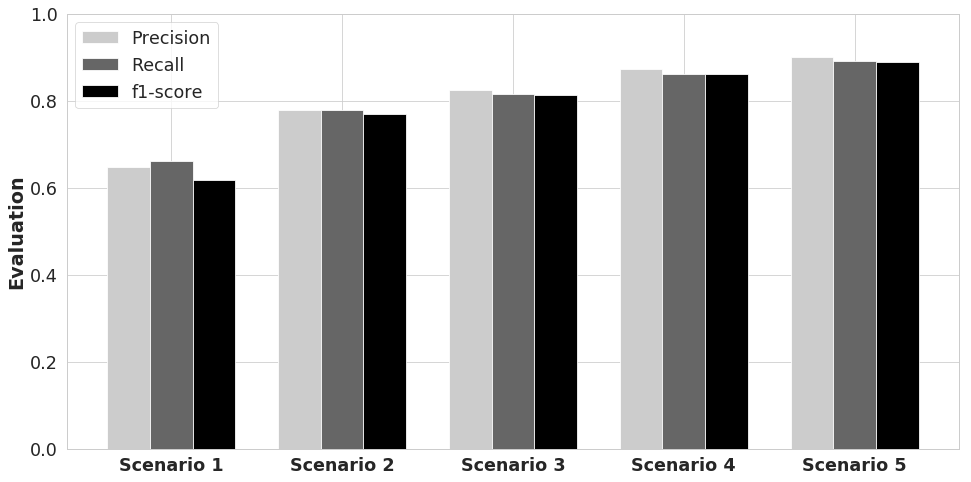

In [22]:
plt.figure(figsize=(16,8))

# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(df['precision']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, df['precision'], color='#cccccc', width=barWidth,
        edgecolor='white', label='Precision')

plt.bar(r2, df['recall'], color='#666666', width=barWidth, 
        edgecolor='white', label='Recall')

plt.bar(r3, df['f1-score'], color='#000000', 
        width=barWidth, edgecolor='white', label='f1-score')
 
# Add xticks on the middle of the group bars
plt.ylabel('Evaluation', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(df['precision']))],
           ['Scenario 1','Scenario 2','Scenario 3','Scenario 4', 'Scenario 5'],
           fontweight='bold')
plt.ylim(0,1)
 
# Create legend & Show graphic
plt.legend(loc='upper left')

plt.savefig("increased_signal_version_2.png")
#files.download("increased_signal_version_2.eps")